In [1]:
from __future__ import absolute_import, division, print_function

# !pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [7]:
def multi_hot_sequences(sequences, dimension):
    # Create all-zero matrix for the shape len(sequences), dimensions
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i,word_indices] = 1.0
    return results

In [8]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

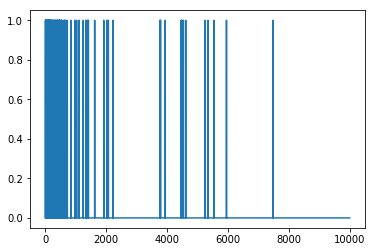

In [9]:
plt.plot(train_data[0])

In [12]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



In [13]:
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [14]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4820 - accuracy: 0.8050 - binary_crossentropy: 0.4820 - val_loss: 0.3264 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3264
Epoch 2/20
25000/25000 - 2s - loss: 0.2415 - accuracy: 0.9136 - binary_crossentropy: 0.2415 - val_loss: 0.2834 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2834
Epoch 3/20
25000/25000 - 2s - loss: 0.1746 - accuracy: 0.9390 - binary_crossentropy: 0.1746 - val_loss: 0.2964 - val_accuracy: 0.8815 - val_binary_crossentropy: 0.2964
Epoch 4/20
25000/25000 - 2s - loss: 0.1384 - accuracy: 0.9528 - binary_crossentropy: 0.1384 - val_loss: 0.3402 - val_accuracy: 0.8702 - val_binary_crossentropy: 0.3402
Epoch 5/20
25000/25000 - 2s - loss: 0.1091 - accuracy: 0.9650 - binary_crossentropy: 0.1091 - val_loss: 0.3479 - val_accuracy: 0.8722 - val_binary_crossentropy: 0.3479
Epoch 6/20
25000/25000 - 2s - loss: 0.0834 - accuracy: 0.9754 - binary_crossentropy: 0.0834 - val_loss: 0.3789

In [16]:
smaller_model =  keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



In [17]:
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [18]:
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [19]:
smaller_history = smaller_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6331 - accuracy: 0.6225 - binary_crossentropy: 0.6331 - val_loss: 0.5767 - val_accuracy: 0.7887 - val_binary_crossentropy: 0.5767
Epoch 2/20
25000/25000 - 2s - loss: 0.5249 - accuracy: 0.8114 - binary_crossentropy: 0.5249 - val_loss: 0.5143 - val_accuracy: 0.8298 - val_binary_crossentropy: 0.5143
Epoch 3/20
25000/25000 - 2s - loss: 0.4678 - accuracy: 0.8686 - binary_crossentropy: 0.4678 - val_loss: 0.4814 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.4814
Epoch 4/20
25000/25000 - 2s - loss: 0.4296 - accuracy: 0.8985 - binary_crossentropy: 0.4296 - val_loss: 0.4605 - val_accuracy: 0.8711 - val_binary_crossentropy: 0.4605
Epoch 5/20
25000/25000 - 2s - loss: 0.3995 - accuracy: 0.9180 - binary_crossentropy: 0.3995 - val_loss: 0.4472 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.4472
Epoch 6/20
25000/25000 - 2s - loss: 0.3749 - accuracy: 0.9304 - binary_crossentropy: 0.3749 - val_loss: 0.4416

In [20]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.3459 - accuracy: 0.8528 - binary_crossentropy: 0.3459 - val_loss: 0.2976 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.2976
Epoch 2/20
25000/25000 - 5s - loss: 0.1448 - accuracy: 0.9469 - binary_crossentropy: 0.1448 - val_loss: 0.3349 - val_accuracy: 0.8705 - val_binary_crossentropy: 0.3349
Epoch 3/20
25000/25000 - 5s - loss: 0.0473 - accuracy: 0.9870 - binary_crossentropy: 0.0473 - val_loss: 0.4545 - val_accuracy: 0.8697 - val_binary_crossentropy: 0.4545
Epoch 4/20
25000/25000 - 5s - loss: 0.0073 - accuracy: 0.9986 - binary_crossentropy: 0.0073 - val_loss: 0.5879 - val_accuracy: 0.8693 - val_binary_crossentropy: 0.5879
Epoch 5/20
25000/25000 - 5s - loss: 9.9330e-04 - accuracy: 1.0000 - binary_crossentropy: 9.9330e-04 - val_loss: 0.6750 - val_accuracy: 0.8701 - val_binary_crossentropy: 0.6750
Epoch 6/20
25000/25000 - 5s - loss: 2.5390e-04 - accuracy: 1.0000 - binary_crossentropy: 2.5390e-04 - 

In [22]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])

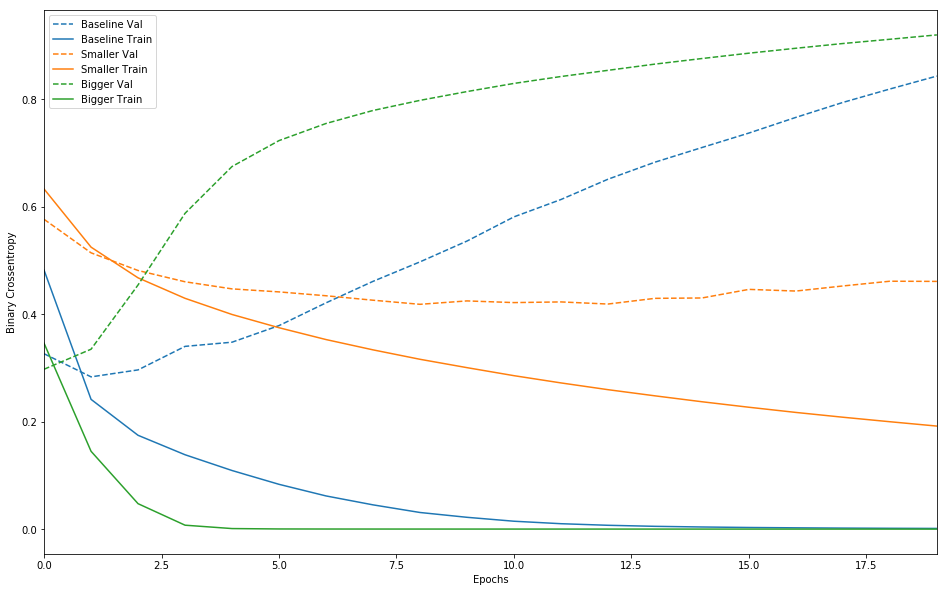

In [23]:
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [24]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


In [25]:
l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

In [26]:
l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5140 - accuracy: 0.8111 - binary_crossentropy: 0.4715 - val_loss: 0.3697 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.3251
Epoch 2/20
25000/25000 - 2s - loss: 0.2959 - accuracy: 0.9093 - binary_crossentropy: 0.2473 - val_loss: 0.3363 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2846
Epoch 3/20
25000/25000 - 2s - loss: 0.2470 - accuracy: 0.9322 - binary_crossentropy: 0.1928 - val_loss: 0.3418 - val_accuracy: 0.8853 - val_binary_crossentropy: 0.2858
Epoch 4/20
25000/25000 - 2s - loss: 0.2266 - accuracy: 0.9410 - binary_crossentropy: 0.1688 - val_loss: 0.3618 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.3027
Epoch 5/20
25000/25000 - 2s - loss: 0.2116 - accuracy: 0.9490 - binary_crossentropy: 0.1515 - val_loss: 0.3733 - val_accuracy: 0.8765 - val_binary_crossentropy: 0.3123
Epoch 6/20
25000/25000 - 2s - loss: 0.2005 - accuracy: 0.9539 - binary_crossentropy: 0.1385 - val_loss: 0.3867

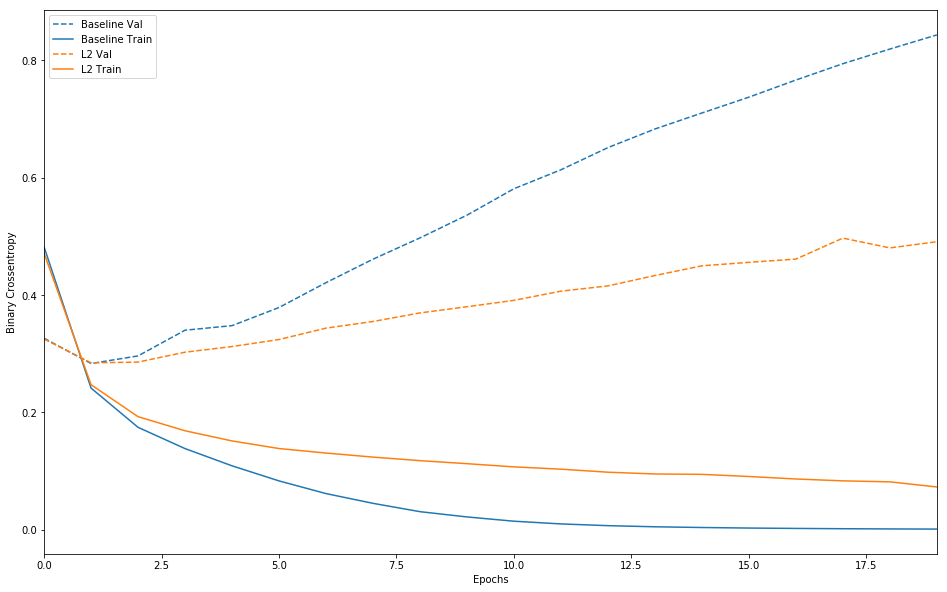

In [27]:
plot_history([('baseline', baseline_history), 
              ('l2', l2_model_history)])

In [28]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')])

In [29]:
dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [30]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6381 - accuracy: 0.6226 - binary_crossentropy: 0.6381 - val_loss: 0.4945 - val_accuracy: 0.8450 - val_binary_crossentropy: 0.4945
Epoch 2/20
25000/25000 - 2s - loss: 0.4693 - accuracy: 0.7876 - binary_crossentropy: 0.4693 - val_loss: 0.3463 - val_accuracy: 0.8805 - val_binary_crossentropy: 0.3463
Epoch 3/20
25000/25000 - 2s - loss: 0.3693 - accuracy: 0.8565 - binary_crossentropy: 0.3693 - val_loss: 0.2963 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.2963
Epoch 4/20
25000/25000 - 2s - loss: 0.3080 - accuracy: 0.8831 - binary_crossentropy: 0.3080 - val_loss: 0.2768 - val_accuracy: 0.8889 - val_binary_crossentropy: 0.2768
Epoch 5/20
25000/25000 - 2s - loss: 0.2620 - accuracy: 0.9022 - binary_crossentropy: 0.2620 - val_loss: 0.2758 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2758
Epoch 6/20
25000/25000 - 2s - loss: 0.2301 - accuracy: 0.9143 - binary_crossentropy: 0.2301 - val_loss: 0.2823

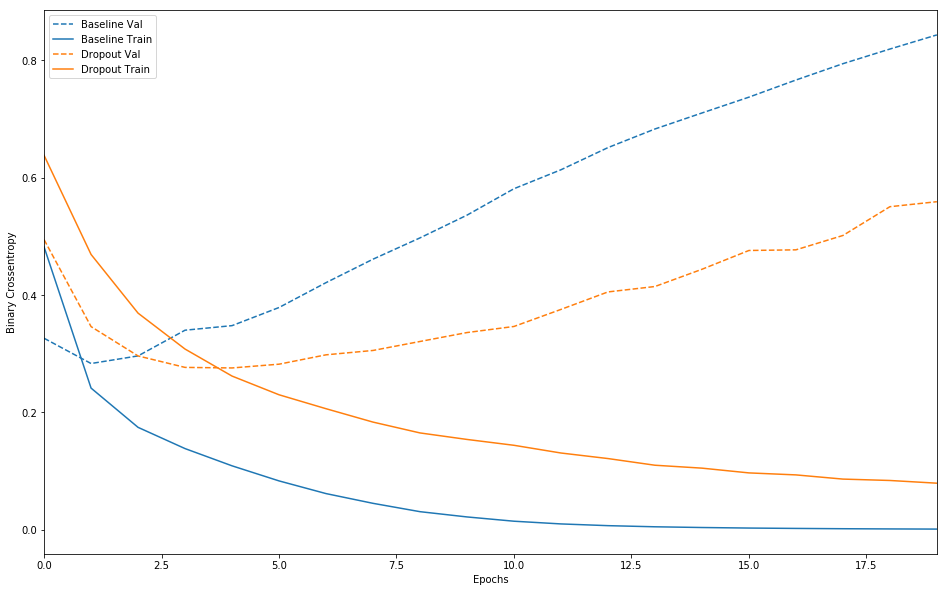

In [31]:
plot_history([('baseline', baseline_history), 
              ('dropout', dpt_model_history)])

# Adding dropout is a clear improvement over the baseline model.

To recap: here are the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.
- And two important approaches not covered in this guide are data-augmentation and batch normalization.